In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(
    '/Users/tylerviducic/dev/hockey_analytics/gamescore_model')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
import seaborn as sns
from utils import helper_funcs
import glob

In [2]:
even_file_path = '/Users/tylerviducic/dev/hockey_analytics/gamescore_model/data/cleaned_data/even_games/'
even_files = glob.glob(even_file_path + '*.csv')
even_df = pd.concat([pd.read_csv(f) for f in even_files], ignore_index=True)
even_df.drop(columns=['Unnamed: 0'], inplace=True)
even_df.describe()

,icetime,shifts,gameScore,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,...,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,home_score,away_score
count,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,...,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000,317170.000000
mean,990.998490,21.413185,0.452363,5.474843,1.685068,0.156293,0.115754,0.382926,0.055065,0.939114,...,9.071444,9.093792,0.087490,0.093119,0.095601,0.511545,0.513269,0.505697,2.886771,2.617744
std,291.938812,5.429036,0.735345,3.278951,1.396364,0.212206,0.106834,0.323199,0.048267,0.786044,...,4.217612,4.230986,0.045154,0.176545,0.178673,0.289784,0.291800,0.285524,1.680995,1.582254
min,2.000000,1.000000,-2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,799.000000,18.000000,-0.055000,3.000000,0.693000,0.018000,0.038000,0.146000,0.021000,0.399000,...,6.000000,6.051000,0.055000,0.000000,0.000000,0.298000,0.298000,0.295000,2.000000,1.000000
50%,998.000000,22.000000,0.300000,5.000000,1.435000,0.078000,0.090000,0.323000,0.045000,0.817000,...,9.000000,8.698000,0.082000,0.000000,0.000000,0.472000,0.473000,0.467000,3.000000,2.000000
75%,1189.000000,25.000000,0.850000,8.000000,2.398000,0.209000,0.167000,0.559000,0.079000,1.341000,...,12.000000,11.680000,0.114000,0.140000,0.149000,0.680000,0.683000,0.672000,4.000000,4.000000
max,2334.000000,45.000000,5.650000,13.000000,14.722000,3.598000,1.250000,3.570000,0.693000,8.222000,...,42.000000,41.879000,0.446000,2.259000,2.259000,2.646000,2.746000,2.642000,10.000000,10.000000


In [3]:
odd_file_path = '/Users/tylerviducic/dev/hockey_analytics/gamescore_model/data/cleaned_data/odd_games/'
odd_files = glob.glob(odd_file_path + '*.csv')
odd_df = pd.concat([pd.read_csv(f) for f in odd_files], ignore_index=True)
odd_df.drop(columns=['Unnamed: 0'], inplace=True)
print(odd_df.describe().to_markdown())


|       |    icetime |       shifts |     gameScore |   iceTimeRank |   I_F_xOnGoal |    I_F_xGoals |   I_F_xRebounds |   I_F_xFreeze |   I_F_xPlayStopped |   I_F_xPlayContinuedInZone |   I_F_xPlayContinuedOutsideZone |   I_F_flurryAdjustedxGoals |   I_F_scoreVenueAdjustedxGoals |   I_F_flurryScoreVenueAdjustedxGoals |   I_F_primaryAssists |   I_F_secondaryAssists |   I_F_shotsOnGoal |   I_F_missedShots |   I_F_blockedShotAttempts |   I_F_shotAttempts |    I_F_points |     I_F_goals |   I_F_rebounds |   I_F_reboundGoals |    I_F_freeze |   I_F_playStopped |   I_F_playContinuedInZone |   I_F_playContinuedOutsideZone |   I_F_savedShotsOnGoal |   I_F_savedUnblockedShotAttempts |     penalties |   I_F_penalityMinutes |   I_F_faceOffsWon |     I_F_hits |   I_F_takeaways |   I_F_giveaways |   I_F_lowDangerShots |   I_F_mediumDangerShots |   I_F_highDangerShots |   I_F_lowDangerxGoals |   I_F_mediumDangerxGoals |   I_F_highDangerxGoals |   I_F_lowDangerGoals |   I_F_mediumDangerGoals |   I_F_

In [4]:
even_df['outsample_avg_goal_diff'] = np.where(even_df['season'] == odd_df['season'], odd_df['season_avg_goal_diff'], np.nan)


In [5]:
even_df.dropna(inplace=True)
print(even_df.head().to_string())

  playerId season          name      gameId playerTeam opposingTeam home_or_away  gameDate position  icetime  shifts  gameScore  iceTimeRank  I_F_xOnGoal  I_F_xGoals  I_F_xRebounds  I_F_xFreeze  I_F_xPlayStopped  I_F_xPlayContinuedInZone  I_F_xPlayContinuedOutsideZone  I_F_flurryAdjustedxGoals  I_F_scoreVenueAdjustedxGoals  I_F_flurryScoreVenueAdjustedxGoals  I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  I_F_missedShots  I_F_blockedShotAttempts  I_F_shotAttempts  I_F_points  I_F_goals  I_F_rebounds  I_F_reboundGoals  I_F_freeze  I_F_playStopped  I_F_playContinuedInZone  I_F_playContinuedOutsideZone  I_F_savedShotsOnGoal  I_F_savedUnblockedShotAttempts  penalties  I_F_penalityMinutes  I_F_faceOffsWon  I_F_hits  I_F_takeaways  I_F_giveaways  I_F_lowDangerShots  I_F_mediumDangerShots  I_F_highDangerShots  I_F_lowDangerxGoals  I_F_mediumDangerxGoals  I_F_highDangerxGoals  I_F_lowDangerGoals  I_F_mediumDangerGoals  I_F_highDangerGoals  I_F_scoreAdjustedShotsAttempts  I_F_unbloc

In [6]:
rate_stats = ['OnIce_F_xGoals', 'OnIce_F_goals',
              'OnIce_A_xGoals', 'OnIce_A_goals']

for stat in rate_stats:
    even_df[stat] = np.where(True, even_df[stat] / even_df['icetime'] * 3600, 0)

In [7]:
from sklearn import model_selection

features = ['I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_goals', 'I_F_hits', 'I_F_takeaways', 
            'I_F_dZoneGiveaways', 'shotsBlockedByPlayer','faceoffsWon', 'faceoffsLost', 'penalties', 
            'penaltiesDrawn', 'OnIce_F_xGoals', 'OnIce_F_goals', 'OnIce_A_xGoals', 'OnIce_A_goals']
target = ['outsample_avg_goal_diff']

x_train, x_test, y_train, y_test = model_selection.train_test_split(even_df[features], even_df[target], test_size=0.2)

In [8]:
x_min_max_scaler = preprocessing.MinMaxScaler()
scaled_x_train = x_min_max_scaler.fit_transform(x_train)
scaled_x_test = x_min_max_scaler.fit_transform(x_test)

y_min_max_scaler = preprocessing.MinMaxScaler()
scaled_y_train = y_min_max_scaler.fit_transform(y_train)
scaled_y_test = y_min_max_scaler.fit_transform(y_test)




In [30]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

In [24]:
model.fit(scaled_x_train, scaled_y_train)

Ridge(alpha=0.2)

In [25]:
print(f'coeficcients: ')
for feature, coef in zip(features, model.coef_[0]):
    print(f'{feature}: {coef}')

coeficcients: 
I_F_primaryAssists: 0.007873344263825244
I_F_secondaryAssists: 0.009698889770076118
I_F_goals: 0.008750445273370768
I_F_hits: -0.0035980031526634364
I_F_takeaways: 0.004061769187888835
I_F_dZoneGiveaways: -0.0030015674673538584
shotsBlockedByPlayer: -0.001791068126703307
faceoffsWon: 0.006300552781046933
faceoffsLost: -0.009680485901421457
penalties: 0.0005981129900415486
penaltiesDrawn: 0.001964436167223349
OnIce_F_xGoals: 0.09972642822253691
OnIce_F_goals: 0.007976060820820363
OnIce_A_xGoals: -0.08329210268440787
OnIce_A_goals: -0.023156372167694023


In [26]:
pred_y = model.predict(scaled_x_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(scaled_y_test, pred_y)}')
print(f'R2: {r2_score(scaled_y_test, pred_y)}')

MSE: 0.004624351118727929
R2: -0.027062811109717533


In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model,
    scaled_x_train,
    scaled_y_train,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True
)

coefs = pd.DataFrame(
    [model_v.coef_[0] for model_v in cv_model['estimator']], columns=features
)

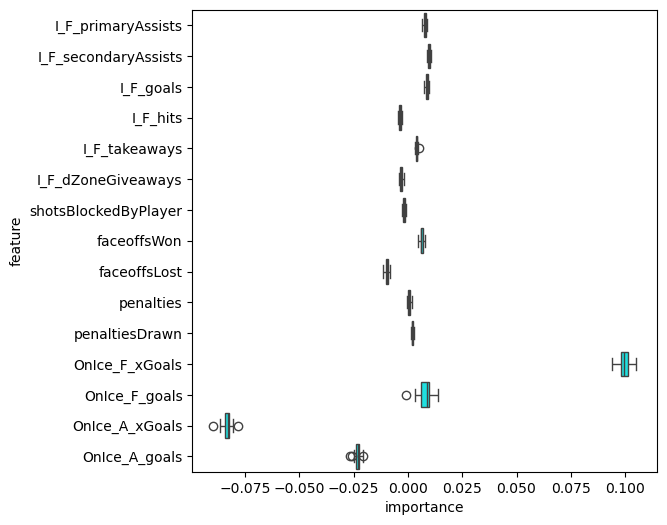

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=coefs, orient="h", ax=ax, color='cyan')
ax.set_xlabel('importance')
ax.set_ylabel('feature')
plt.show()